In [1]:
# -*- coding: utf-8 -*-

'''
@Author   :   Corley Tang
@contact  :   cutercorleytd@gmail.com
@Github   :   https://github.com/corleytd
@Time     :   2023-01-11 19:14
@Project  :   Hands-on Deep Learning with PyTorch-tensor_linear_algebra
张量的线性代数运算
'''

# 导入所需的库
import warnings

import torch
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning)

## 1.BLAS和LAPACK概览
BLAS（Basic Linear Algeria Subprograms）和LAPACK（Linear Algeria Package）模块提供了完整的线性代数基本方法，函数种类较多，因此此处进行简单分类如下：
- **矩阵的形变及特殊矩阵的构造方法**：包括矩阵的转置、对角矩阵的创建、单位矩阵的创建、上/下三角矩阵的创建等
- **矩阵的基本运算**：包括矩阵乘法、向量内积、矩阵和向量的乘法等，当然，此处还包含了高维张量的基本运算，将着重探讨矩阵的基本运算拓展至三维张量中的基本方法
- **矩阵的线性代数运算**：包括矩阵的迹、矩阵的秩、逆矩阵的求解、伴随矩阵和广义逆矩阵等
- **矩阵分解运算**：特征分解和SVD分解（奇异值分解）等

矩阵的两种理解方式：
- 高维空间中的数据点的集合
- 方程组的简写形式

## 2.矩阵的形变及特殊矩阵构造方法
矩阵的形变方法其实也就是二维张量的形变方法，在实际线性代数运算过程中，经常涉及一些特殊矩阵，如单位矩阵、对角矩阵等。

In [2]:
# 转置
t1 = torch.randint(1, 100, size=(3, 4))
t1, torch.t(t1), t1.t()

(tensor([[83, 86, 80, 28],
         [91, 59, 75, 69],
         [55, 93, 35, 30]]),
 tensor([[83, 91, 55],
         [86, 59, 93],
         [80, 75, 35],
         [28, 69, 30]]),
 tensor([[83, 91, 55],
         [86, 59, 93],
         [80, 75, 35],
         [28, 69, 30]]))

In [3]:
# 单位矩阵
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [4]:
# 对角矩阵，对角矩阵上移，对角矩阵下移
t2 = torch.randint(1, 20, size=(5,))
torch.diag(t2), t2.diag(), torch.diag(t2, diagonal=2), torch.diag(t2, -2)

(tensor([[ 9,  0,  0,  0,  0],
         [ 0, 13,  0,  0,  0],
         [ 0,  0, 10,  0,  0],
         [ 0,  0,  0,  7,  0],
         [ 0,  0,  0,  0,  6]]),
 tensor([[ 9,  0,  0,  0,  0],
         [ 0, 13,  0,  0,  0],
         [ 0,  0, 10,  0,  0],
         [ 0,  0,  0,  7,  0],
         [ 0,  0,  0,  0,  6]]),
 tensor([[ 0,  0,  9,  0,  0,  0,  0],
         [ 0,  0,  0, 13,  0,  0,  0],
         [ 0,  0,  0,  0, 10,  0,  0],
         [ 0,  0,  0,  0,  0,  7,  0],
         [ 0,  0,  0,  0,  0,  0,  6],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0]]),
 tensor([[ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 9,  0,  0,  0,  0,  0,  0],
         [ 0, 13,  0,  0,  0,  0,  0],
         [ 0,  0, 10,  0,  0,  0,  0],
         [ 0,  0,  0,  7,  0,  0,  0],
         [ 0,  0,  0,  0,  6,  0,  0]]))

In [5]:
# 上三角矩阵，上三角矩阵左下偏移，上三角矩阵右上偏移
t3 = torch.randint(1, 30, size=(4, 4))
t3, torch.triu(t3), t3.triu(-1), t3.triu(1)

(tensor([[21,  8, 20,  7],
         [10, 26, 27,  6],
         [28, 27, 17,  1],
         [12,  5, 19,  1]]),
 tensor([[21,  8, 20,  7],
         [ 0, 26, 27,  6],
         [ 0,  0, 17,  1],
         [ 0,  0,  0,  1]]),
 tensor([[21,  8, 20,  7],
         [10, 26, 27,  6],
         [ 0, 27, 17,  1],
         [ 0,  0, 19,  1]]),
 tensor([[ 0,  8, 20,  7],
         [ 0,  0, 27,  6],
         [ 0,  0,  0,  1],
         [ 0,  0,  0,  0]]))

In [6]:
# 下三角矩阵，下三角矩阵左下偏移，下三角矩阵右上偏移
t3, torch.tril(t3), torch.tril(t3, -1), t3.tril(1)

(tensor([[21,  8, 20,  7],
         [10, 26, 27,  6],
         [28, 27, 17,  1],
         [12,  5, 19,  1]]),
 tensor([[21,  0,  0,  0],
         [10, 26,  0,  0],
         [28, 27, 17,  0],
         [12,  5, 19,  1]]),
 tensor([[ 0,  0,  0,  0],
         [10,  0,  0,  0],
         [28, 27,  0,  0],
         [12,  5, 19,  0]]),
 tensor([[21,  8,  0,  0],
         [10, 26, 27,  0],
         [28, 27, 17,  1],
         [12,  5, 19,  1]]))

## 3.矩阵的基本运算
矩阵不同于普通的二维数组，其具备一定的线性代数含义，而这些特殊的性质，其实就主要体现在矩阵的基本运算上。

In [7]:
# 1.dot、vdot——点积计算：只能作用于一维张量，且对于数值型对象，二者计算结果并没有区别，两种函数只在进行复数运算时会有区别
# torch.dot(t1, t1)  # RuntimeError，只支持一维张量
torch.dot(t2, t2), t2.vdot(t2)

(tensor(435), tensor(435))

In [8]:
# 2.mm——矩阵乘法
t1.shape, t3.shape

(torch.Size([3, 4]), torch.Size([4, 4]))

In [9]:
# 矩阵乘法
torch.mm(t1, t3)

tensor([[5179, 5200, 5874, 1205],
        [5429, 4632, 5999, 1135],
        [3425, 3953, 4776, 1008]])

In [10]:
# 对应位置相乘
t1 * t1

tensor([[6889, 7396, 6400,  784],
        [8281, 3481, 5625, 4761],
        [3025, 8649, 1225,  900]])

In [11]:
# 3.mv——矩阵和向量相乘：可以看作先将向量转化为列向量再相乘，需要矩阵的列数和向量的元素个数保持相同，应用场景较多，例如线性方程组求解
t4 = torch.randint(1, 20, size=(4,))
torch.mv(t1, t4), torch.mm(t1, t4.reshape(-1, 1)), torch.mm(t1, t4.reshape(-1, 1)).flatten()

(tensor([3148, 3277, 2572]),
 tensor([[3148],
         [3277],
         [2572]]),
 tensor([3148, 3277, 2572]))

In [12]:
# 4.bmm——批量矩阵相乘：三维张量的矩阵相乘，是三维张量内部各对应位置的矩阵相乘，需要两个矩阵第一维大小相同、二三维满足矩阵乘法的条件
t5 = torch.randint(1, 20, size=(3, 2, 2))
t6 = torch.randint(1, 20, size=(3, 2, 3))
t5.shape, t6.shape

(torch.Size([3, 2, 2]), torch.Size([3, 2, 3]))

In [13]:
t56_bnn = torch.bmm(t5, t6)
t56_bnn.shape, t56_bnn

(torch.Size([3, 2, 3]),
 tensor([[[334, 194, 394],
          [340, 188, 292]],
 
         [[163, 157,  74],
          [178, 166,  76]],
 
         [[290, 262, 296],
          [375, 295, 360]]]))

In [14]:
# 5.addmm——矩阵相乘再相加
t4.shape, t1.shape, t3.shape

(torch.Size([4]), torch.Size([3, 4]), torch.Size([4, 4]))

In [15]:
torch.addmm(t4, t1, t3), t4 + torch.mm(t1, t3), torch.addmm(t4, t1, t3, beta=2, alpha=3)

(tensor([[5191, 5214, 5882, 1216],
         [5441, 4646, 6007, 1146],
         [3437, 3967, 4784, 1019]]),
 tensor([[5191, 5214, 5882, 1216],
         [5441, 4646, 6007, 1146],
         [3437, 3967, 4784, 1019]]),
 tensor([[15561, 15628, 17638,  3637],
         [16311, 13924, 18013,  3427],
         [10299, 11887, 14344,  3046]]))

In [16]:
# 6.addbmm——批量矩阵相乘再相加，会对批量相乘后的三维张量第一个维度求和
t7 = torch.randint(1, 20, size=(2, 3))
torch.addbmm(t7, t5, t6), t7 + torch.bmm(t5, t6).sum(0)

(tensor([[793, 619, 776],
         [894, 668, 733]]),
 tensor([[793, 619, 776],
         [894, 668, 733]]))

# 4.矩阵的线性代数运算

In [17]:
# 1.trace——矩阵的迹：矩阵对角线元素之和，并不一定要求是方阵
torch.trace(t3), t3.trace(), t1.trace()

(tensor(65), tensor(65), tensor(177))

In [18]:
# 2.rank——矩阵的秩：矩阵中行或列的极大线性无关数，且矩阵中行、列极大无关数总是相同的，任何矩阵的秩都是唯一值，满秩指的是方阵（行数和列数相同的矩阵）中行数、列数和秩相同，满秩矩阵有线性唯一解等重要特性，而其他矩阵也能通过求解秩来降维
t8 = torch.tensor([[1., 3], [2, 6]])
torch.matrix_rank(t7.to(torch.float)), torch.matrix_rank(t8)

(tensor(2), tensor(1))

In [19]:
# 3.det——矩阵的行列式：矩阵的一个基本性质或者属性，通过行列式的计算，可以知道矩阵是否可逆，从而进一步求解矩阵所对应的线性方程，是矩阵进行线性变换的伸缩因子
t3 = t3.float()
torch.det(t3), t8.det()

(tensor(66746.), tensor(-0.))

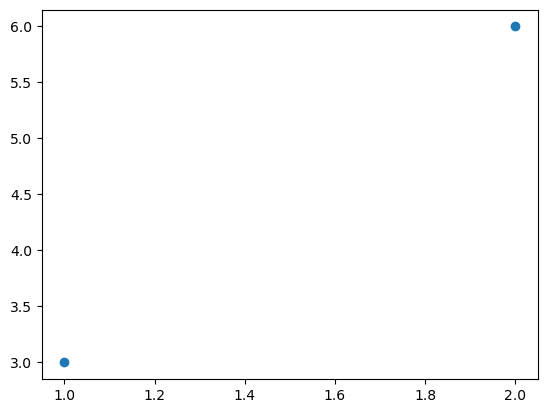

In [20]:
# 4.线性方程组的矩阵表达形式——逆矩阵
plt.plot(t8[:, 0], t8[:, 1], 'o')
plt.show()

In [21]:
# inverse函数：逆矩阵
t3_inverse = torch.inverse(t3)
t3_inverse, t3.inverse()

(tensor([[ 0.0288, -0.0381,  0.0284, -0.0017],
         [-0.0227,  0.0290,  0.0228, -0.0377],
         [-0.0195,  0.0143, -0.0213,  0.0719],
         [ 0.1381,  0.0402, -0.0505, -0.1573]]),
 tensor([[ 0.0288, -0.0381,  0.0284, -0.0017],
         [-0.0227,  0.0290,  0.0228, -0.0377],
         [-0.0195,  0.0143, -0.0213,  0.0719],
         [ 0.1381,  0.0402, -0.0505, -0.1573]]))

In [22]:
torch.mm(t3, t3_inverse), torch.mm(t3_inverse, t3)

(tensor([[ 1.0000e+00,  0.0000e+00,  2.9802e-08,  2.3842e-07],
         [-1.1921e-07,  1.0000e+00,  8.9407e-08,  2.3842e-07],
         [-2.0862e-07, -5.9605e-08,  1.0000e+00,  3.5763e-07],
         [-8.1956e-08,  0.0000e+00, -5.2154e-08,  1.0000e+00]]),
 tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00, -1.4901e-08],
         [ 5.9605e-08,  1.0000e+00, -2.2352e-08, -1.4901e-08],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00],
         [ 1.1921e-07,  2.0862e-07,  0.0000e+00,  1.0000e+00]]))

In [23]:
# t3 * x = t9 -> x = t3_reverse * t9
t9 = torch.randint(1, 20, size=(t3.size(0),), dtype=torch.float)
res = torch.mv(t3_inverse, t9)
res  # y = res[0] * x1 + res[1] * x2 + res[2] * x3 + res[4]

tensor([ 0.3661, -0.1311, -0.0135,  1.5187])

## 5.矩阵的分解
矩阵的分解也是矩阵运算中的常规计算，矩阵分解也有很多种类，常见的例如**QR分解**、**LU分解**、**特征分解**、**SVD分解**等等，虽然大多数情况下，矩阵分解都是在形式上将矩阵拆分成几种特殊矩阵的乘积，但本质上，矩阵的分解是去探索矩阵更深层次的一些属性。

In [24]:
# 1.eig——特征分解：A = V * diag(λ) * V-1，只能作用于方阵，输出值分别表示特征值和Q矩阵
torch.eig(t3, eigenvectors=True), t3.float().eig(eigenvectors=True)

(torch.return_types.eig(
 eigenvalues=tensor([[64.2417,  0.0000],
         [14.9217,  0.0000],
         [-7.0817,  4.4134],
         [-7.0817, -4.4134]]),
 eigenvectors=tensor([[-0.4384,  0.6602,  0.0846, -0.1704],
         [-0.5893, -0.6935,  0.2164, -0.1932],
         [-0.6032, -0.0239, -0.4340,  0.3352],
         [-0.3110,  0.2874,  0.7609,  0.0000]])),
 torch.return_types.eig(
 eigenvalues=tensor([[64.2417,  0.0000],
         [14.9217,  0.0000],
         [-7.0817,  4.4134],
         [-7.0817, -4.4134]]),
 eigenvectors=tensor([[-0.4384,  0.6602,  0.0846, -0.1704],
         [-0.5893, -0.6935,  0.2164, -0.1932],
         [-0.6032, -0.0239, -0.4340,  0.3352],
         [-0.3110,  0.2874,  0.7609,  0.0000]])))

In [25]:
# 2.SVD——奇异值分解：A = U Σ VT，U、V是正交矩阵
t3[:, -1] = t3[:, 1] * 3
u, s, v = torch.svd(t3)
u, s, v

(tensor([[-0.2609,  0.7254, -0.0909, -0.6304],
         [-0.6536, -0.3113,  0.6650, -0.1836],
         [-0.6885, -0.1319, -0.6748,  0.2306],
         [-0.1751,  0.5995,  0.3069,  0.7181]]),
 tensor([1.3195e+02, 2.3625e+01, 1.4831e+01, 3.4246e-07]),
 tensor([[-2.5310e-01,  6.6131e-01, -7.0613e-01,  1.6477e-07],
         [-2.9214e-01, -1.2077e-01, -8.3913e-03, -9.4868e-01],
         [-2.8722e-01,  6.4562e-01,  7.0759e-01, -1.9252e-08],
         [-8.7641e-01, -3.6230e-01, -2.5174e-02,  3.1623e-01]]))

In [26]:
# 验证SVD
torch.diag(s), torch.mm(torch.mm(u, torch.diag(s)), v.t())

(tensor([[1.3195e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 2.3625e+01, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4831e+01, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4246e-07]]),
 tensor([[21.0000,  8.0000, 20.0000, 24.0000],
         [10.0000, 26.0000, 27.0000, 78.0000],
         [28.0000, 27.0000, 17.0000, 81.0000],
         [12.0000,  5.0000, 19.0000, 15.0000]]))

In [27]:
# 根据SVD结果进行降维：4 -> 3
u_reduced = u[:, [0, 1, 2]]
s_reduced = s[[0, 1, 2]]
v_reduced = v[:, [0, 1, 2]].t()
torch.mm(u_reduced * s_reduced, v_reduced)  # 得到的新矩阵与原矩阵t3（几乎）一致

tensor([[21.0000,  8.0000, 20.0000, 24.0000],
        [10.0000, 26.0000, 27.0000, 78.0000],
        [28.0000, 27.0000, 17.0000, 81.0000],
        [12.0000,  5.0000, 19.0000, 15.0000]])